In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pickle
from astropy.io import fits
from astropy import coordinates as coord, units as u
from astropy.time import Time
import sys

%matplotlib widget

Abbiamo bisogno delle posizioni del target e due reference stars. Devono essere di luminosità comparabile alla nostra stella.
Usiamo l'algoritmo del centroide e facciamo la annulus selection e ricerca delle coordinate. Nel report finale vuole che siano presenti i plot dove mostriamo i cerchi attorno al target e alle reference stars.

In [11]:
# Target coordinates
x_target = 320
y_target = 41

x_reference_01 = 195
y_reference_01 = 62

#x_reference_02 = ...
#y_reference_02 = ...

# Aperture parameters
aperture = 10
inner_radius = 20
outer_radius = 30

Ora performiamo l'aperture photometry sul target e sulle reference stars usando la classe definita nella scorsa lezione.

In [12]:
from Class import TemporaryAperturePhotometry
target_ap08 = TemporaryAperturePhotometry()
target_ap08.provide_aperture_parameters(inner_radius, outer_radius, aperture, x_target, y_target)
target_ap08.aperture_photometry()

reference01_ap08 = TemporaryAperturePhotometry()
reference01_ap08.provide_aperture_parameters(inner_radius, outer_radius, aperture, x_reference_01, y_reference_01)
reference01_ap08.aperture_photometry()

#reference02_ap08 = TemporaryAperturePhotometry
#reference02_ap08.provide_aperture_parameters(inner_radius, outer_radius, aperture, x_target, y_target)
#reference02_ap08.aperture_photometry()

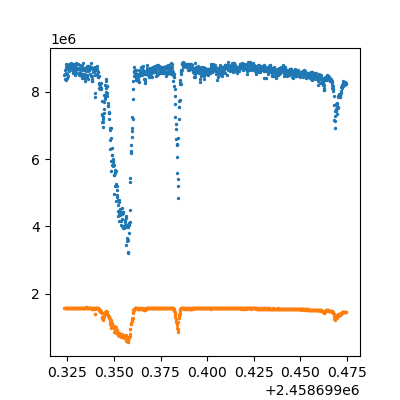

In [13]:

plt.figure(figsize=(4,4))
plt.scatter(target_ap08.julian_date, target_ap08.aperture, s=2)
plt.scatter(reference01_ap08.julian_date, reference01_ap08.aperture, s=2)
plt.show()

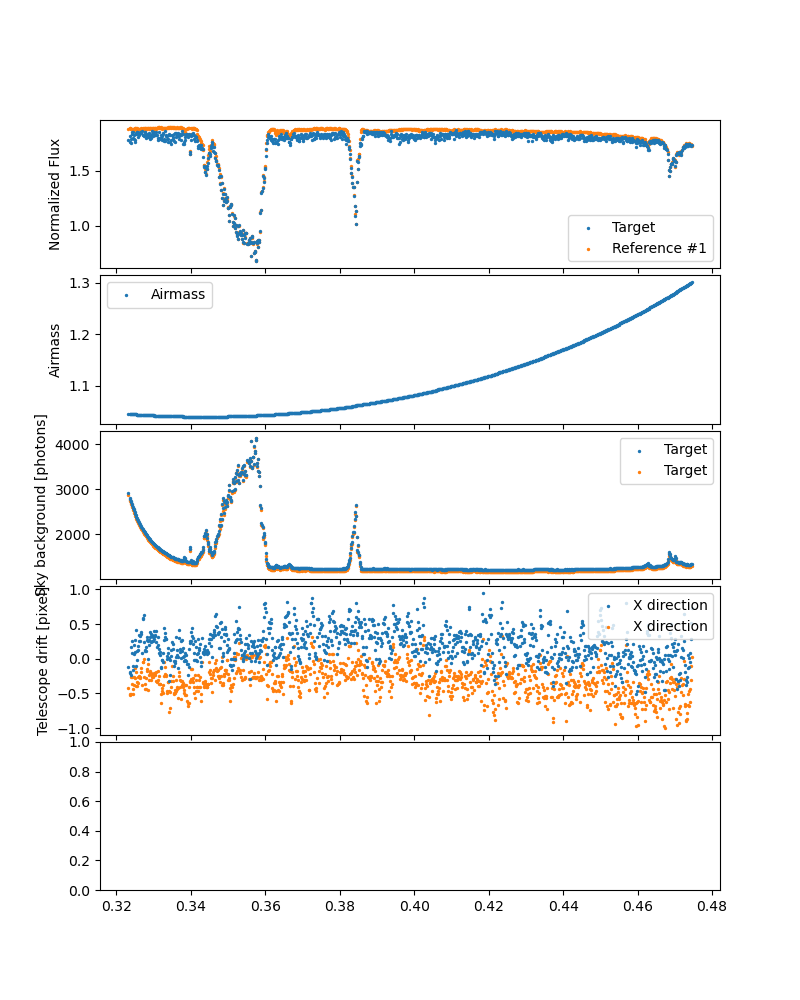

In [ ]:
time_offset = 2458699.00
normalization_index = 200

fig, axs = plt.subplots(5,1, sharex=True, figsize=(8,10))
fig.subplots_adjust(hspace=0.05)

#zorder indica il layer di sovrapposizione delle linee all'interno dello stesso plot, quello con il zorder più alto sarà visibile sopra gli altri.
# Primo plot, flusso.
axs[0].scatter(target_ap08.julian_date - time_offset, target_ap08.aperture / target_ap08.aperture[normalization_index],
                s=2, zorder=3, c='C0', label='Target')
axs[0].scatter(reference01_ap08.julian_date - time_offset, reference01_ap08.aperture / reference01_ap08.aperture[normalization_index],
                s=2, zorder=2, c='C1', label='Reference #1')
#axs[0].scatter(reference02_ap08.julian_date - time_offset, reference02_ap08.aperture / reference02_ap08.aperture[normalization_index],
#               s=2, zorder=1, c='C2', label='Reference #2')
axs[0].set_ylabel('Normalized Flux')
axs[0].legend()

# Secondo plot, arimass.
axs[1].scatter(target_ap08.julian_date - time_offset, target_ap08.airmass, s=2, c='C0', label='Airmass')
axs[1].set_ylabel('Airmass')
axs[1].legend()

# Terzo plot, sky background.
axs[2].scatter(target_ap08.julian_date-time_offset, target_ap08.sky_background,
               s=2, zorder=3, c='C0', label='Target')
axs[2].scatter(reference01_ap08.julian_date-time_offset, reference01_ap08.sky_background,
               s=2, zorder=2, c='C1', label='Target')
#axs[2].scatter(reference02_ap08.julian_date-time_offset, reference02_ap08.sky_background,
#               s=2, zorder=1, c='C0', label='Target')
axs[2].set_ylabel('Sky background [photons]')
axs[2].legend()

axs[3].scatter(target_ap08.julian_date - time_offset, target_ap08.x_position - target_ap08.x_position[normalization_index],
               s=2, zorder=3, c='C0', label='X direction')
axs[3].scatter(reference01_ap08.julian_date-time_offset, reference01_ap08.x_position - reference01_ap08.x_position[normalization_index],
               s=2, zorder=2, c='C1', label='X direction')
#axs[3].scatter(reference02_ap08.julian_date-time_offset, reference02_ap08.x_position - reference02_ap08.x_position[normalization_index],
#               s=2, zorder=1, c='C2', label='X direction')
axs[3].set_ylabel('Telescope drift [pixel]')
axs[3].legend()

#L'ultimo plot è la FWHM che non abbiamo ancora fatto è da aggiungere nel centroid si trova su STEM tra gli extra.


Polynomial([ 5.57577259,  0.04137709, -0.07994321], domain=[-0.075796,  0.050973], window=[-1.,  1.], symbol='x')

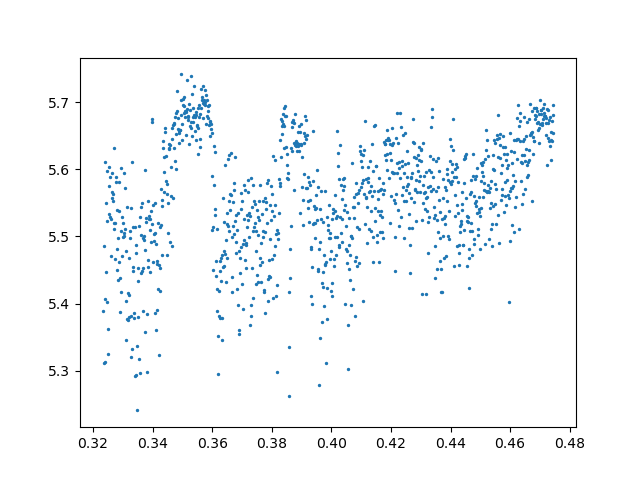

In [33]:
plt.figure()
plt.scatter(target_ap08.julian_date-time_offset, target_ap08.aperture/reference01_ap08.aperture, s=2, label='Ref #1')
#plt.scatter(target_ap08.julian_date-time_offset, target_ap08.aperture/reference02_ap08.aperture, s=2, label='Ref #2')

#plt.scatter(target_ap08.julian_date-time_offset, target_ap08.aperture/(reference01_ap08.aperture + reference02_ap08.aperture), s=2, label='All Refs')

differential_ap08_ref01 = target_ap08.aperture / reference01_ap08.aperture
#differential_ap08_ref02 = target_ap08.aperture / reference02_ap08.aperture
#differential_ap08_allref = target_ap08.aperture / (reference01_ap08.aperture + reference02_ap08.aperture)

# For this step fit the part outside the transit, we have to avoid it. We don't have the transit for now so just make an example.
# If my transit is between 0.34 and 0.42 jd for example:
median_bjdtdb = np.median(target_ap08.julian_date)
time_01 = time_offset + 0.340
time_02 = time_offset + 0.420

out_transit_selection = (target_ap08.julian_date < time_01) | (target_ap08.julian_date > time_02)
#Add another condition
out_transit_selection = ((target_ap08.julian_date < time_01) | (target_ap08.julian_date > time_02)) & (target_ap08.julian_date < time_offset + 0.450)

from numpy.polynomial import Polynomial
#If you don't remove the median the x0 is 0.
poly_ap08_ref01_pfit = Polynomial.fit(target_ap08.julian_date[out_transit_selection] - median_bjdtdb, differential_ap08_ref01[out_transit_selection], deg=2)
# Also for the other reference star and all together.
poly_ap08_ref01_pfit


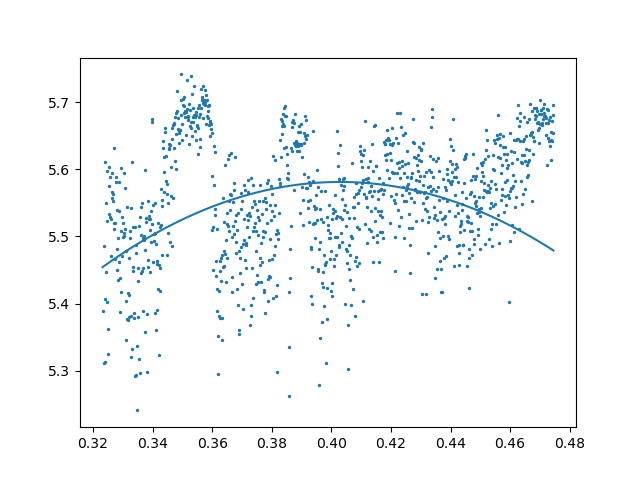

In [34]:
plt.figure()
plt.scatter(target_ap08.julian_date-time_offset, target_ap08.aperture/reference01_ap08.aperture, s=2, label='Ref #1')
plt.plot(target_ap08.julian_date-time_offset, poly_ap08_ref01_pfit(target_ap08.julian_date - median_bjdtdb))

Standard Deviation Ref #01:  0.012734686112803668
Standard Deviation Ref #02:  0.012734686112803668
Standard Deviation Ref #All Refs:  0.012734686112803668


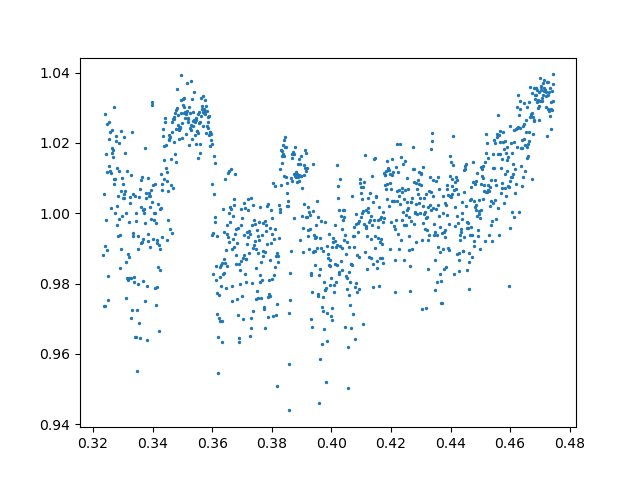

In [40]:
normalized_differential_ap08_ref01 = differential_ap08_ref01 / poly_ap08_ref01_pfit(target_ap08.julian_date-median_bjdtdb)
#ripeti con altre reference stars o combinazioni di reference stars

plt.figure()
plt.scatter(target_ap08.julian_date-time_offset, normalized_differential_ap08_ref01, s=2, label='Ref #1')

print('Standard Deviation Ref #01: ', np.std(normalized_differential_ap08_ref01[out_transit_selection]))
print('Standard Deviation Ref #02: ', np.std(normalized_differential_ap08_ref01[out_transit_selection]))
print('Standard Deviation Ref #All Refs: ', np.std(normalized_differential_ap08_ref01[out_transit_selection]))

#Adding a reference star should reduce the standard deviation.
pickle.dump(differential_ap08_ref01, open('differential_ap08_ref01.p', 'wb'))